In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
X = df.drop(columns = ['math score'], axis = 1)

In [22]:
y = df['math score']

In [23]:
# Create a column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [24]:
X = preprocessor.fit_transform(X)

In [25]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)
X_train.shape, X_test.shape

((750, 19), (250, 19))

#### Create an evaluation metric to give all the metrics after model Training

In [27]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, r2_square

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regression": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
}

model_list = []
r2_list = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    
    # Make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(name)
    model_list.append(name)
    
    print("Model performance for Training set")
    print(f" - Root mean squared Error {model_train_rmse:.4f}")
    print(f" - Mean Absolute Error {model_train_mae:.4f}")
    print(f" - R2 Score: {model_train_r2:.4f}")
    
    print("-------------------------------------")
    
    print("Model performance for Test set")
    print(f" - Root mean squared Error {model_test_rmse:.4f}")
    print(f" - Mean Absolute Error {model_test_mae:.4f}")
    print(f" - R2 Score: {model_test_r2:.4f}")
    r2_list.append(model_test_r2)
    
    print('='*35)
    print("\n")


LinearRegression
Model performance for Training set
 - Root mean squared Error 28.0862
 - Mean Absolute Error 4.2401
 - R2 Score: 0.8742
-------------------------------------
Model performance for Test set
 - Root mean squared Error 30.0982
 - Mean Absolute Error 4.3419
 - R2 Score: 0.8777


Lasso
Model performance for Training set
 - Root mean squared Error 42.9223
 - Mean Absolute Error 5.1837
 - R2 Score: 0.8077
-------------------------------------
Model performance for Test set
 - Root mean squared Error 44.2775
 - Mean Absolute Error 5.2217
 - R2 Score: 0.8200


Ridge
Model performance for Training set
 - Root mean squared Error 28.0642
 - Mean Absolute Error 4.2368
 - R2 Score: 0.8743
-------------------------------------
Model performance for Test set
 - Root mean squared Error 30.0173
 - Mean Absolute Error 4.3354
 - R2 Score: 0.8780


K-Neighbors Regression
Model performance for Training set
 - Root mean squared Error 33.5391
 - Mean Absolute Error 4.5848
 - R2 Score: 0.8497


#### Results

In [31]:
pd.DataFrame(list(zip(model_list, r2_list)), columns= ['Model Name', "R2_Score"]).sort_values(by=['R2_Score'], ascending= False)

,Model Name,R2_Score
2,Ridge,0.877990
0,LinearRegression,0.877661
5,Random Forest Regressor,0.849107
1,Lasso,0.820027
3,K-Neighbors Regression,0.793324
4,Decision Tree,0.757747


In [32]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.77


Text(0, 0.5, 'Predicted')

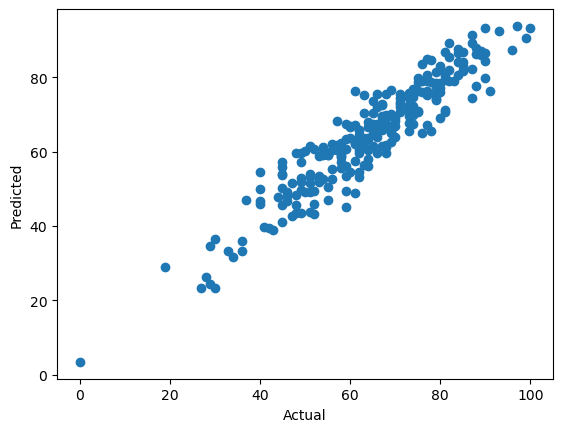

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

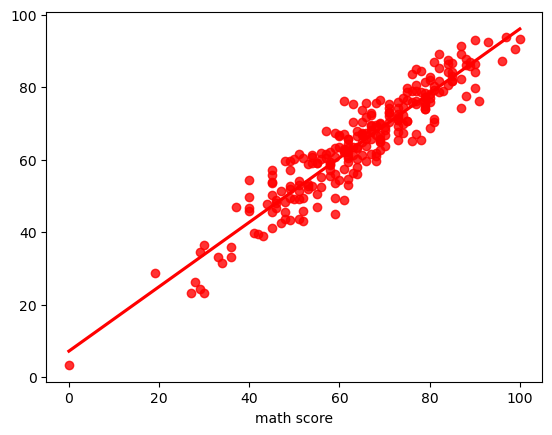

In [34]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')